In [8]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This dataset, sourced from Kaggle, contains detailed information about grocery items, including product categories, brands, and pricing data. Itdoes not include sales records.

In [12]:
df = pd.read_csv("dataset/Australia_Grocery_2022Sep.csv")

In [10]:
df.head()

,index,Postal_code,Category,Sub_category,Product_Group,Product_Name,Package_price,Price_per_unit,package_size,is_estimated,...,Retail_price,Product_Url,Brand,Sku,RunDate,unit_price,unit_price_unit,state,city,tid
0,0,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Necks,7.15,$6.50 per 1Kg,approx. 1.1kg,1,...,NaN,https://shop.coles.com.au/a/alexandria/product...,Coles,1491280P,2022-11-09 08:23:06,6.50,1Kg,NSW,TEMPE,29742568
1,1,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Livers,5.40,$9.00 per 1Kg,approx. 600g,1,...,NaN,https://shop.coles.com.au/a/alexandria/product...,Coles,1718058P,2022-11-09 08:23:06,9.00,1Kg,NSW,TEMPE,29742569
2,2,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Giblets,4.50,$7.50 per 1Kg,approx. 600g,1,...,NaN,https://shop.coles.com.au/a/alexandria/product...,Coles,2565429P,2022-11-09 08:23:06,7.50,1Kg,NSW,TEMPE,29742570
3,3,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Frames,3.38,$4.50 per 1Kg,approx. 750g each,1,...,4.13,https://shop.coles.com.au/a/alexandria/product...,Coles,3199541P,2022-11-09 08:23:06,4.50,1Kg,NSW,TEMPE,29742571
4,4,2044,Meat & seafood,Poultry,Crumbed chicken,RSPCA Chicken Schnitzel Plain Crumb,10.50,$8.75 per 1Kg,1.2kg,0,...,11.00,https://shop.coles.com.au/a/alexandria/product...,Coles,2904193P,2022-11-09 08:23:06,8.75,1Kg,NSW,TEMPE,29742572


In [77]:
#get the total rows and columns of the dataset
df.shape

(488640, 22)

In [5]:
#print the datatype of all the columns along with non null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488640 entries, 0 to 488639
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   index            488640 non-null  int64  
 1   Postal_code      488640 non-null  int64  
 2   Category         488640 non-null  object 
 3   Sub_category     488640 non-null  object 
 4   Product_Group    488640 non-null  object 
 5   Product_Name     488640 non-null  object 
 6   Package_price    487313 non-null  float64
 7   Price_per_unit   485498 non-null  object 
 8   package_size     487869 non-null  object 
 9   is_estimated     488640 non-null  int64  
 10  is_special       488640 non-null  int64  
 11  in_stock         36454 non-null   object 
 12  Retail_price     136953 non-null  float64
 13  Product_Url      488640 non-null  object 
 14  Brand            488640 non-null  object 
 15  Sku              488640 non-null  object 
 16  RunDate          488640 non-null  obje

**Let's count the total null values present in each columns and sort them in descending order.**

In [6]:
df.isna().sum().sort_values(ascending=False)

in_stock           452186
Retail_price       351687
unit_price           3142
Price_per_unit       3142
unit_price_unit      3142
Package_price        1327
package_size          771
Product_Group           0
Product_Name            0
Category                0
Postal_code             0
index                   0
Sub_category            0
is_estimated            0
Product_Url             0
is_special              0
Sku                     0
Brand                   0
RunDate                 0
state                   0
city                    0
tid                     0
dtype: int64

Converting the missing values in terms of percentage. Let us set the tolerable threshold value for missing values as 30%.

In [13]:
#calcuate the percentage for each column
df_mean = df.isna().mean()*100.00

#arrange the values in descending order
df_mean.sort_values(ascending=False)

unit_price         0.643009
unit_price_unit    0.643009
Price_per_unit     0.643009
Package_price      0.271570
package_size       0.157785
Category           0.000000
Postal_code        0.000000
index              0.000000
Sub_category       0.000000
is_estimated       0.000000
Product_Group      0.000000
Product_Name       0.000000
Product_Url        0.000000
is_special         0.000000
Sku                0.000000
Brand              0.000000
RunDate            0.000000
state              0.000000
city               0.000000
tid                0.000000
dtype: float64

Since, two columns exceed the threshold, we will drop those columns. Also, we are not using prodcut URL as well.

In [13]:
df.drop(columns=['index','in_stock','Retail_price', 'Product_Url'], inplace=True)

Drop the duplicated entries in the dataset and keep only unique data.

In [79]:
#drop the duplicate occurrances
df.drop_duplicates(inplace=True)

In [15]:
dup.shape

(488640, 20)

Renaming the columns for uniformity.

In [37]:
df.columns

Index(['index', 'Postal_code', 'Category', 'Sub_category', 'Product_Group',
       'Product_Name', 'Package_price', 'Price_per_unit', 'package_size',
       'is_estimated', 'is_special', 'in_stock', 'Retail_price', 'Product_Url',
       'Brand', 'Sku', 'RunDate', 'unit_price', 'unit_price_unit', 'state',
       'city', 'tid', 'full_form'],
      dtype='object')

In [14]:
df.rename(columns={
    'index': 'index',
    'Postal_code': 'postal_code',
    'Category': 'category',
    'Sub_category': 'sub_category',
    'Product_Group': 'product_group',
    'Product_Name': 'product_name',
    'Package_price': 'package_price',
    'Price_per_unit': 'price_per_unit',
    'package_size': 'package_size',
    'is_estimated': 'is_estimated',
    'is_special': 'is_special',
    'in_stock': 'in_stock',
    'Retail_price': 'retail_price',
    'Brand': 'brand',
    'Sku': 'sku',
    'RunDate': 'run_date',
    'unit_price': 'unit_price',
    'unit_price_unit': 'unit_price_unit',
    'state': 'state',
    'city': 'city',
    'tid': 'tid',
}, inplace=True)

Find unique items listed under category.

In [45]:
df.category.unique()

array(['Meat & seafood', 'Fruit & vegetables', 'Dairy, eggs & fridge',
       'Bakery', 'Pantry', 'Drinks'], dtype=object)

Count all the occurances of each category items.

In [10]:
df['category'].value_counts()

category
Pantry                  284413
Dairy, eggs & fridge     67745
Drinks                   64883
Meat & seafood           32674
Fruit & vegetables       22106
Bakery                   16819
Name: count, dtype: int64

Pantry has the highest occurances while Bakery has the lowest.

In [30]:
df.iloc[:,0:6]

,postal_code,category,sub_category,product_group,product_name,package_price
0,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Necks,7.15
1,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Livers,5.40
2,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Giblets,4.50
3,2044,Meat & seafood,Poultry,Chicken offal,RSPCA Approved Chicken Frames,3.38
4,2044,Meat & seafood,Poultry,Crumbed chicken,RSPCA Chicken Schnitzel Plain Crumb,10.50
...,...,...,...,...,...,...
488635,9601,Drinks,Coffee Drinks,Accessories Coffee,Coffee Machine Descaler,4.00
488636,9601,Drinks,Coffee Drinks,Accessories Coffee,Coffee Mate French Vanilla Flavoured Liquid Co...,5.00
488637,9601,Drinks,Coffee Drinks,Accessories Coffee,Coffee Filter Papers 10-12 Cup Size 4,3.00
488638,9601,Drinks,Coffee Drinks,Accessories Coffee,Barista Coffee Machine,99.00


In [10]:
df.iloc[:,6:10]

,package_price,price_per_unit,package_size,is_estimated
0,7.15,$6.50 per 1Kg,approx. 1.1kg,1
1,5.40,$9.00 per 1Kg,approx. 600g,1
2,4.50,$7.50 per 1Kg,approx. 600g,1
3,3.38,$4.50 per 1Kg,approx. 750g each,1
4,10.50,$8.75 per 1Kg,1.2kg,0
...,...,...,...,...
488635,4.00,$1.60 per 100mL,250mL,0
488636,5.00,$3.33 per 100mL,150mL,0
488637,3.00,$0.08 per 1Ea,1 pack,0
488638,99.00,$99.00 per 1Ea,1 each,0


In [8]:
df.iloc[:,11:16]

,brand,sku,run_date,unit_price,unit_price_unit
0,Coles,1491280P,2022-11-09 08:23:06,6.50,1Kg
1,Coles,1718058P,2022-11-09 08:23:06,9.00,1Kg
2,Coles,2565429P,2022-11-09 08:23:06,7.50,1Kg
3,Coles,3199541P,2022-11-09 08:23:06,4.50,1Kg
4,Coles,2904193P,2022-11-09 08:23:06,8.75,1Kg
...,...,...,...,...,...
488635,Coles,3209077P,2022-11-09 08:23:06,1.60,100mL
488636,Nestle,8987047P,2022-11-09 08:23:06,3.33,100mL
488637,Harris,47955P,2022-11-09 08:23:06,0.08,1Ea
488638,L'OR,5745722P,2022-11-09 08:23:06,99.00,1Ea


In [9]:
df.iloc[:,17:]

,city,tid
0,TEMPE,29742568
1,TEMPE,29742569
2,TEMPE,29742570
3,TEMPE,29742571
4,TEMPE,29742572
...,...,...
488635,CANBERRA CIVIC DOORDASH DUMMY,30231203
488636,CANBERRA CIVIC DOORDASH DUMMY,30231204
488637,CANBERRA CIVIC DOORDASH DUMMY,30231205
488638,CANBERRA CIVIC DOORDASH DUMMY,30231206


Find all the distinct states in the *state* column.

In [11]:
np.sort(df.state.unique())

array(['ACT', 'NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC', 'WA'], dtype=object)

It appears that state column includes two territories as well, Australian Capital Territory and Northern Territory.

Create a new column with full form for each of the states for readability.

In [9]:
df['full_form'] = df.state.replace({
'NSW': 'New South Wales',
'ACT': 'Australian Capital Territory',
'VIC': 'Victoria',
'QLD': 'Queensland',
'SA': 'South Australia',
'WA': 'Western Australia',
'TAS': 'Tasmania',
'NT': 'Northern Territory'})

Examine all the cities for abnormality.

In [14]:
np.sort(df.city.unique())

array(['ALBANY', 'BAINES', 'BAROSSA GOLDFIELDS',
       'BELCONNEN DOORDASH DUMMY', 'BELMONT', 'BEN BUCKLER', 'BIGGS FLAT',
       'BONOGIN', 'BRISBANE', 'BRUNSWICK', 'BURNIE',
       'BUSSELTON DOOR DASH DUMMY', 'CANBERRA CIVIC DOORDASH DUMMY',
       'CANTERBURY', 'CONDER', 'COSTELLO', 'COTTESLOE', 'CURTIN',
       'DARWIN CITY', 'DEVONPORT', 'EAST MELBOURNE', 'EDEN HILLS',
       'FRANKLIN', 'GASCOYNE RIVER', 'GIBSON DESERT SOUTH', 'GYMEA BAY',
       'HAMILTON SOUTH', 'HDPORTSORELLPORT', 'HECKENBERG', 'HERSTON',
       'HOBART', 'ILLAWONG', 'ILPARPA', 'JUNCTION DD DUMMY', 'KALAMUNDA',
       'KALEEN', 'LAKEMBA', 'LAUNCESTON', 'LIGHT PASS', 'MACQUARIE',
       'MANUKA', 'MENAI', 'MOUNT MELVILLE', 'NEW FARM', 'NORTH PERTH',
       'OAKLANDS PARK', 'ONKAPARINGA HILLS', 'PALKAGEE', 'PERTH',
       'PETRIE TERRACE', 'ROCKINGHAM', 'ROSETOWN', 'ROSNY',
       'SEACLIFF PARK', 'SEASWIFT', 'SERPENTINE', 'SEVENTEEN MILE ROCKS',
       'SHERWOOD', 'SORELL', 'SOUTH LAUNCESTON', 'SOUTH MELBOURN

There are *seven* cities that seem like erroneous entry. Count how many entries are there for those cities.

In [12]:
df.city.value_counts()[[
'YARRAVILLE DOORDASH DUMMY',
'HDPORTSORELLPORT',
'BUSSELTON DOOR DASH DUMMY',
'JUNCTION DD DUMMY',
'BELCONNEN DOORDASH DUMMY',
'CANBERRA CIVIC DOORDASH DUMMY',
'ULVERSTONE TO MEADOW MEWS TEMPZONE 2']]

city
YARRAVILLE DOORDASH DUMMY               6949
HDPORTSORELLPORT                        6250
BUSSELTON DOOR DASH DUMMY               6414
JUNCTION DD DUMMY                       6904
BELCONNEN DOORDASH DUMMY                6622
CANBERRA CIVIC DOORDASH DUMMY           6487
ULVERSTONE TO MEADOW MEWS TEMPZONE 2    6096
Name: count, dtype: int64

In [ ]:
The numbers look significant.

In [83]:
df.loc[df.city=='HDPORTSORELLPORT', ['state','full_form','postal_code']].head(1)

,state,full_form,postal_code
343102,TAS,Tasmania,9010


The city has postal code **9010** but the state is **Tasmania**. The state should be **Queensland**.

In [13]:
df.loc[df.city=='HDPORTSORELLPORT', ['state','full_form']] = ['QLD','Queensland'] 

In [85]:
df.loc[df.city=='HDPORTSORELLPORT', ['state','full_form','postal_code']].sample(5)

,state,full_form,postal_code
360749,QLD,Queensland,9010
346019,QLD,Queensland,9010
344940,QLD,Queensland,9010
362637,QLD,Queensland,9010
346221,QLD,Queensland,9010


In [86]:
np.sort(df.postal_code.unique())

array([ 800,  852,  870,  872, 2026, 2044, 2168, 2193, 2195, 2227, 2234,
       2303, 2906, 2913, 3002, 3013, 3797, 3823, 4000, 4005, 4006, 4067,
       4073, 4075, 4109, 4213, 4217, 5046, 5049, 5050, 5152, 5153, 5163,
       5275, 5351, 5355, 5670, 6000, 6006, 6011, 6076, 6125, 6168, 6330,
       6705, 7000, 7249, 7250, 9010, 9013, 9018, 9056, 9140, 9172, 9205,
       9216, 9217, 9250, 9310, 9315, 9320, 9330, 9585, 9601, 9603, 9605,
       9606, 9611, 9614, 9617])

Looking at the city names it appears that the first word represent the city. We will rename these cities based on the first word.

In [14]:
df.replace({'city':{'ULVERSTONE TO MEADOW MEWS TEMPZONE 2':'Ulverstone',
                    'JUNCTION DD DUMMY': 'Junction',
                    'YARRAVILLE DOORDASH DUMMY': 'Yarrraville',
                    'BUSSELTON DOOR DASH DUMMY': 'Busselton',
                    'BELCONNEN DOORDASH DUMMY': 'Belconnen',
                    'CANBERRA CIVIC DOORDASH DUMMY': 'Canberra',
                    'Hdportsorellport': 'Brisbane'}},inplace=True)

In [15]:
df.loc[df.city=='Junction', 'state'] = 'NSW'

For readability, convert the values of the column **city** to lowercase.

In [89]:
df['city'] = df.city.str.title()

In [16]:
# Convert RunDate to datetime
df['run_date'] = pd.to_datetime(df['run_date'], errors='coerce')

# Convert numeric columns
numeric_cols = ['package_price', 'unit_price']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [17]:
# Extract numeric value and unit (e.g., "1.2kg" -> 1.2, "kg")
df[['package_qty', 'package_unit']] = df['package_size'].str.extract(r'([\d\.]+)\s*([A-Za-z]+)')
df['package_qty'] = pd.to_numeric(df.package_qty, errors="coerce")

In [18]:
df.drop_duplicates(inplace=True)
df.fillna({'Brand': 'Unknown', 'Package_price': df['package_price'].median()}, inplace=True)

In [19]:
df.dropna(inplace=True)

In [20]:
df.shape

(485486, 22)

# Exploratory Data Analysis #

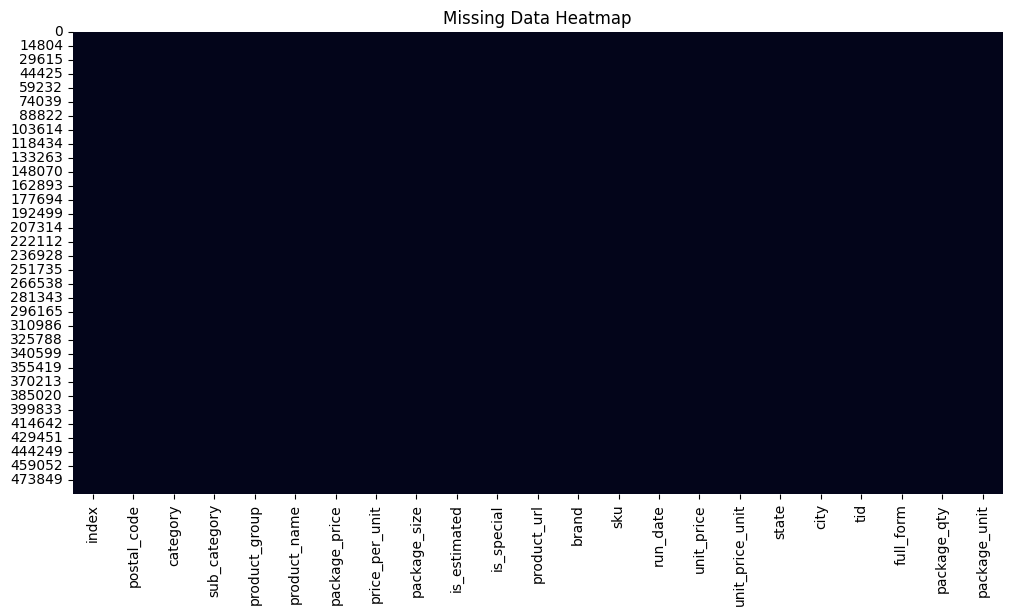

index             0.0
postal_code       0.0
category          0.0
sub_category      0.0
product_group     0.0
product_name      0.0
package_price     0.0
price_per_unit    0.0
package_size      0.0
is_estimated      0.0
dtype: float64

In [106]:
# Missing value heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

# Summary of missingness (%)
(df.isnull().mean()*100).round(2).sort_values(ascending=False).head(10)


### Category & Brand Summary ###

In [5]:
top_brands = df.groupby('brand').size().sort_values(ascending=False).head(10).reset_index(name='total')
top_brands

,brand,total
0,Coles,89280
1,Cadbury,10450
2,Kellogg's,8414
3,Nescafe,8054
4,Arnott's,7788
5,Uncle Tobys,6740
6,Vittoria,6510
7,Twinings,5834
8,Bega,5823
9,Nestle,5156


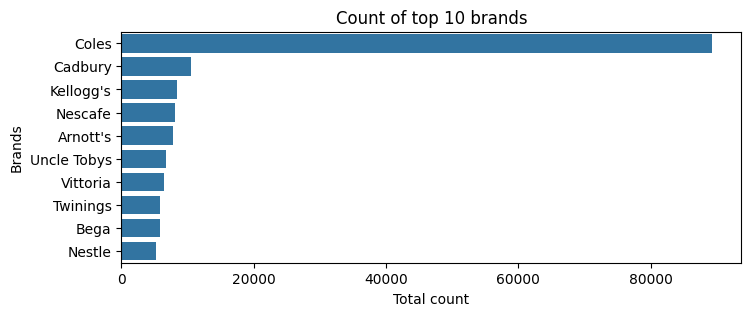

In [20]:
# plt.figure(figsize=(10, 6))
# plt.rcParams['figure.figsize'] = (10, 6)  # sets default size for all future plots

sns.barplot(data=top_brands, x='total', y='brand')
plt.xlabel("Total count")
plt.ylabel("Brands")
plt.title("Count of top 10 brands")
# plt.tight_layout()
fig = plt.gcf()                # Get the current figure object
fig.set_size_inches(8, 3)  

# plt.savefig("sample1.png", bbox_inches="tight", dpi=300)

plt.show()



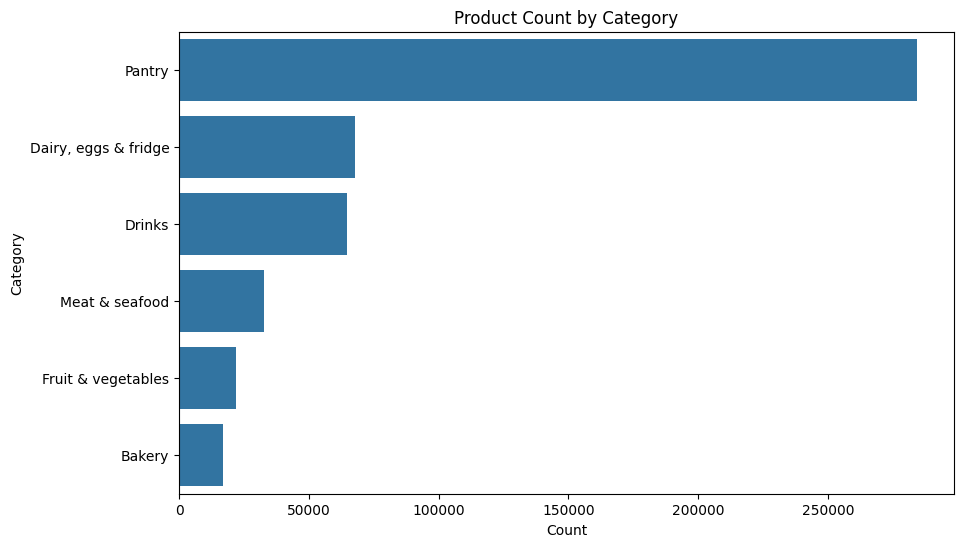

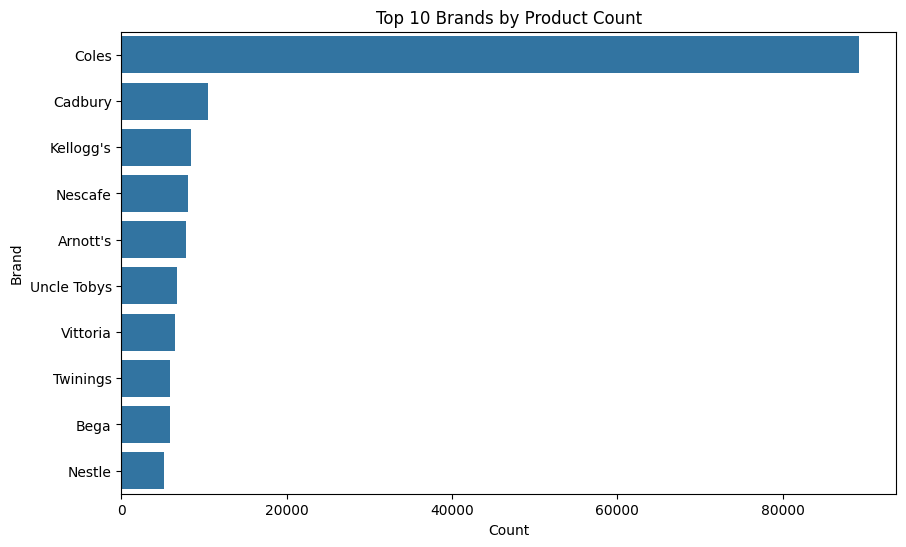

In [21]:
cat_count = df['category'].value_counts()
brand_count = df['brand'].value_counts().head(10)

# plt.figure(figsize=(10,5))
sns.barplot(x=cat_count.values, y=cat_count.index)
plt.title("Product Count by Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

# plt.figure(figsize=(10,5))
sns.barplot(x=brand_count.values, y=brand_count.index)
plt.title("Top 10 Brands by Product Count")
plt.xlabel("Count")
plt.ylabel("Brand")
plt.show()


### Package vs Unit Price Relationship ###

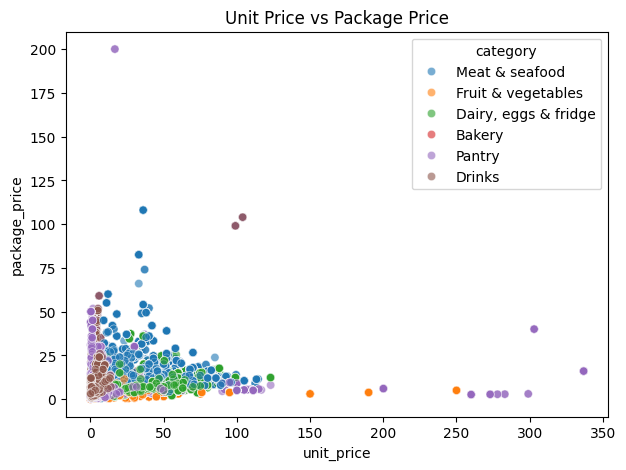

               package_price  unit_price
package_price       1.000000    0.223679
unit_price          0.223679    1.000000


In [18]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='unit_price', y='package_price', hue='category', data=df, alpha=0.6)
plt.title("Unit Price vs Package Price")
plt.show()

corr = df[['package_price', 'unit_price']].corr()
print(corr)


### Price Distribution by Category ###

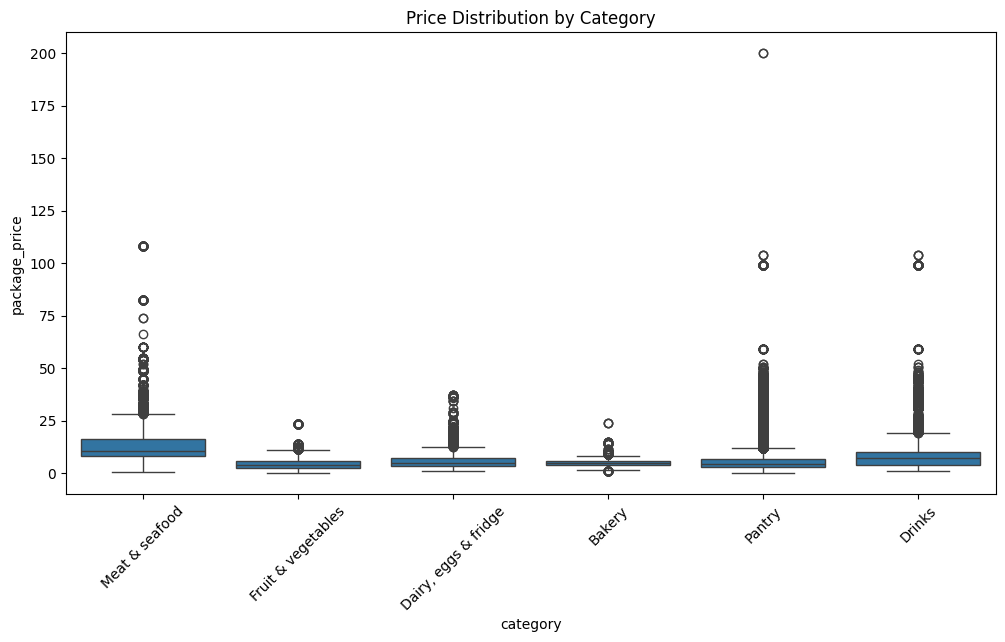

In [112]:
plt.figure(figsize=(12,6))
sns.boxplot(x='category', y='package_price', data=df)
plt.xticks(rotation=45)
plt.title("Price Distribution by Category")
plt.show()

### Average Price by State or City ###

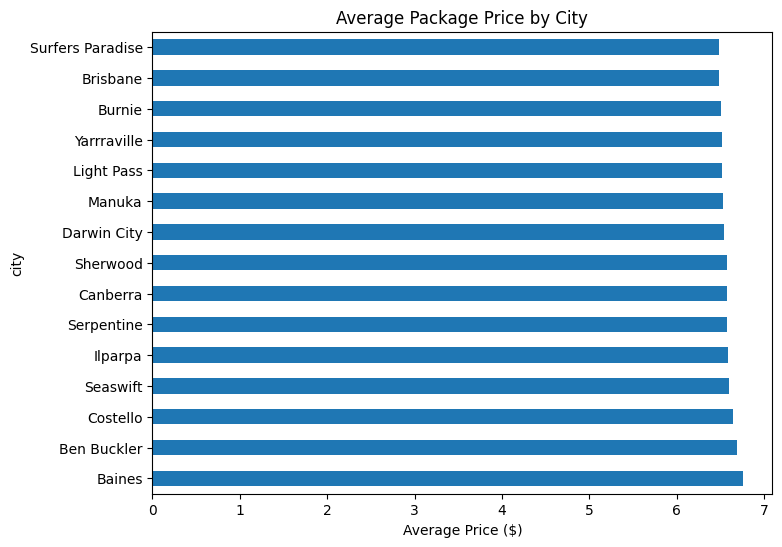

In [113]:
avg_city = df.groupby('city')['package_price'].mean().sort_values(ascending=False).head(15)
avg_city.plot(kind='barh', figsize=(8,6), title="Average Package Price by City")
plt.xlabel("Average Price ($)")
plt.show()


### Price Variation Across States ###

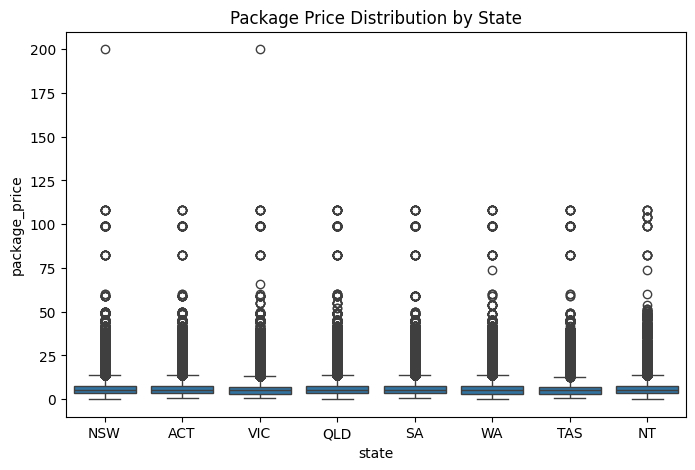

In [114]:
plt.figure(figsize=(8,5))
sns.boxplot(x='state', y='package_price', data=df)
plt.title("Package Price Distribution by State")
plt.show()


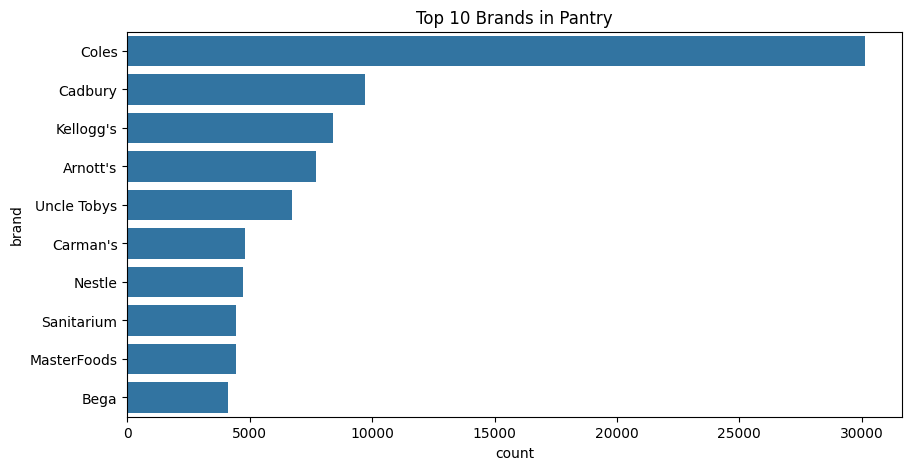

In [115]:
top_category = df['category'].value_counts().index[0]
top_cat_df = df[df['category'] == top_category]

plt.figure(figsize=(10,5))
sns.countplot(y='brand', data=top_cat_df, order=top_cat_df['brand'].value_counts().index[:10])
plt.title(f"Top 10 Brands in {top_category}")
plt.show()


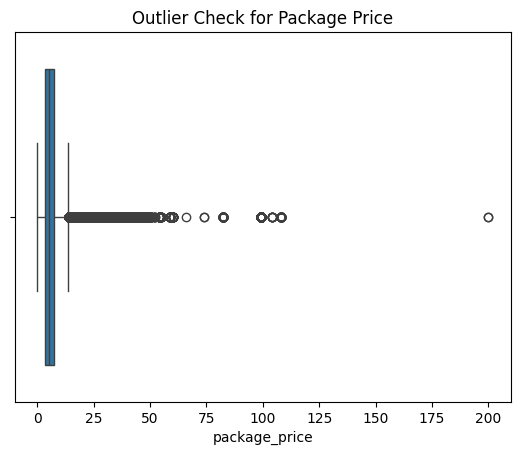

In [116]:
sns.boxplot(x=df['package_price'])
plt.title("Outlier Check for Package Price")
plt.show()


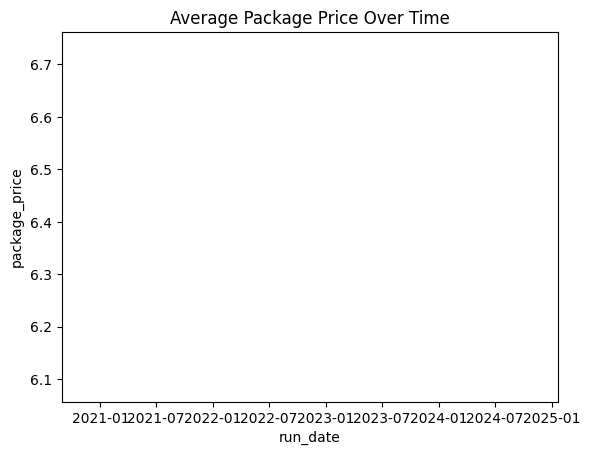

In [117]:
df['run_date'] = pd.to_datetime(df['run_date'])
daily_price = df.groupby('run_date')['package_price'].mean().reset_index()
sns.lineplot(data=daily_price, x='run_date', y='package_price')
plt.title("Average Package Price Over Time")
plt.show()


In [21]:
df.groupby('sub_category')['brand'].count()

sub_category
Beef & veal                       6461
Breakfast                        34275
Cheese                           33628
Chips, crackers & snacks         96581
Coffee                           23616
Coffee Drinks                    23756
Confectionery                    51574
Dairy                            20484
Eggs                              1845
Energy drinks                     3755
Fruit                             6073
Jams, honey & spreads            16584
Lamb                              2985
Milk                             11788
Mince                             1349
Oils & vinegars                  11153
Packaged Breads                   8406
Packaged Cakes & Sweet Treats     8413
Pork                              3475
Poultry                           9136
Sauces                           34982
Seafood                           9268
Soft drinks                      18807
Sports drinks                     2890
Tea                              15648
Tea Drinks  

In [11]:
summary = df.groupby('sub_category')['brand'].count().reset_index(name='count')

# summary['percent'] = (summary['count'] / summary['count'].sum()) * 100
print(summary)


                     sub_category  count
0                     Beef & veal   6461
1                       Breakfast  34275
2                          Cheese  33628
3        Chips, crackers & snacks  96581
4                          Coffee  23616
5                   Coffee Drinks  23756
6                   Confectionery  51574
7                           Dairy  20484
8                            Eggs   1845
9                   Energy drinks   3755
10                          Fruit   6073
11          Jams, honey & spreads  16584
12                           Lamb   2985
13                           Milk  11788
14                          Mince   1349
15                Oils & vinegars  11153
16                Packaged Breads   8406
17  Packaged Cakes & Sweet Treats   8413
18                           Pork   3475
19                        Poultry   9136
20                         Sauces  34982
21                        Seafood   9268
22                    Soft drinks  18807
23              

In [25]:
df.groupby('sub_category', as_index=False).agg(total=('brand','count'))

# x.agg(average=('total','mean')).sort_values(by=['total'],ascending=False)

,sub_category,total
0,Beef & veal,6461
1,Breakfast,34275
2,Cheese,33628
3,"Chips, crackers & snacks",96581
4,Coffee,23616
5,Coffee Drinks,23756
6,Confectionery,51574
7,Dairy,20484
8,Eggs,1845
9,Energy drinks,3755


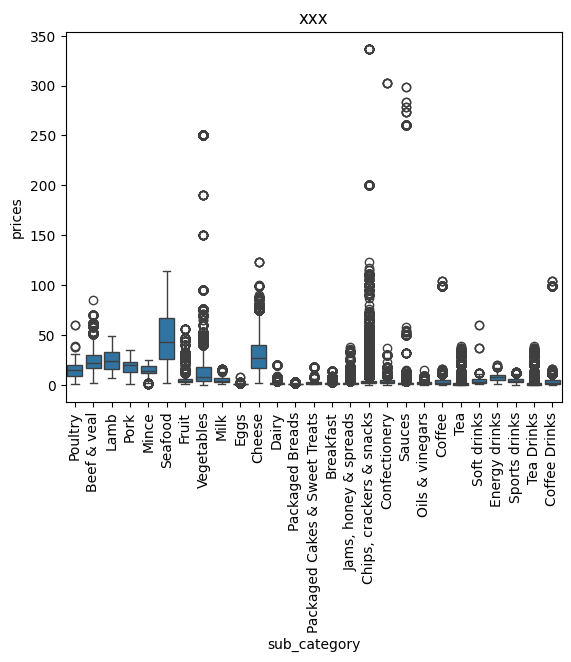

In [140]:
x = sns.boxplot(x='sub_category', y='unit_price', data=df)
x.set(xlabel="Category", ylabel="Price", title='Various Prices of the Listings')
plt.xticks(rotation=90)   # Rotate labels vertically
plt.show()


In [141]:
df.loc[df.sub_category=='Vegetables',]

,index,postal_code,category,sub_category,product_group,product_name,package_price,price_per_unit,package_size,is_estimated,...,run_date,unit_price,unit_price_unit,state,city,tid,full_form,package_qty,package_unit,is_outlier
524,524,2044,Fruit & vegetables,Vegetables,"Asparagus, fennel & artichokes",Green Asparagus,1.90,$1.90 per 1Ea,1 bunch,0,...,2022-11-09 08:23:06,1.9,1Ea,NSW,Tempe,29743092,New South Wales,1.0,bunch,False
525,525,2044,Fruit & vegetables,Vegetables,"Asparagus, fennel & artichokes",Mini Asparagus,1.90,$1.90 per 1Ea,1 bunch,0,...,2022-11-09 08:23:06,1.9,1Ea,NSW,Tempe,29743093,New South Wales,1.0,bunch,False
526,526,2044,Fruit & vegetables,Vegetables,"Asparagus, fennel & artichokes",Fennel,2.50,$2.50 per 1Ea,1 bunch,0,...,2022-11-09 08:23:06,2.5,1Ea,NSW,Tempe,29743094,New South Wales,1.0,bunch,False
527,527,2044,Fruit & vegetables,Vegetables,"Asparagus, fennel & artichokes",Asparagus Entertainer Large,2.90,$2.90 per 1Ea,1 bunch,0,...,2022-11-09 08:23:06,2.9,1Ea,NSW,Tempe,29743095,New South Wales,1.0,bunch,False
528,528,2044,Fruit & vegetables,Vegetables,"Asparagus, fennel & artichokes",Organic Green Asparagus,5.50,$5.50 per 1Ea,1 bunch,0,...,2022-11-09 08:23:06,5.5,1Ea,NSW,Tempe,29743096,New South Wales,1.0,bunch,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485654,485654,9601,Fruit & vegetables,Vegetables,Spinach & silverbeet,Spinach Bunch,4.90,$4.90 per 1Ea,1 each,0,...,2022-11-09 08:23:06,4.9,1Ea,ACT,Canberra,30228222,Australian Capital Territory,1.0,each,False
485655,485655,9601,Fruit & vegetables,Vegetables,Turnips & root vegetables,Radish,3.50,$3.50 per 1Ea,1 bunch,0,...,2022-11-09 08:23:06,3.5,1Ea,ACT,Canberra,30228223,Australian Capital Territory,1.0,bunch,False
485656,485656,9601,Fruit & vegetables,Vegetables,Turnips & root vegetables,Swedes Loose,1.38,$6.00 per 1Kg,approx. 230g each,1,...,2022-11-09 08:23:06,6.0,1Kg,ACT,Canberra,30228224,Australian Capital Territory,230.0,g,False
485657,485657,9601,Fruit & vegetables,Vegetables,Turnips & root vegetables,Fresh Turnips,1.08,$6.00 per 1Kg,approx. 180g each,1,...,2022-11-09 08:23:06,6.0,1Kg,ACT,Canberra,30228225,Australian Capital Territory,180.0,g,False


### Outlier detection ###

In [138]:
Q1 = df.groupby('sub_category')['unit_price'].transform(lambda x: x.quantile(0.25))
Q3 = df.groupby('sub_category')['unit_price'].transform(lambda x: x.quantile(0.75))
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


df['is_outlier'] = (df['unit_price'] < lower) | (df['unit_price'] > upper)
df.loc[(df.is_outlier==True) & (df.sub_category=='Coffee Drinks'), ['sub_category','unit_price','is_outlier']]



,sub_category,unit_price,is_outlier
5907,Coffee Drinks,12.00,True
5974,Coffee Drinks,12.00,True
6945,Coffee Drinks,10.53,True
6961,Coffee Drinks,13.50,True
6965,Coffee Drinks,11.00,True
...,...,...,...
488572,Coffee Drinks,12.00,True
488574,Coffee Drinks,11.00,True
488584,Coffee Drinks,12.22,True
488587,Coffee Drinks,13.33,True


In [152]:
outliers_by_subcat = (
    df.loc[df.is_outlier == True]
      .groupby('sub_category')['unit_price']
      .unique()
)

(outliers_by_subcat['Vegetables'])


array([ 44.  ,  76.  ,  95.  ,  40.  ,  69.  ,  49.  , 250.  ,  46.67,
        52.67,  47.5 , 190.  ,  45.02,  50.02,  70.  ,  42.86,  40.01,
        41.67,  60.  ,  75.  , 150.  ,  71.43,  65.  ])

In [162]:
df.loc[(df.sub_category=='Vegetables') & (df.unit_price>140),'unit_price'].unique()

array([250., 190., 150.])

In [129]:
potential_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68927 entries, 5 to 488638
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            68927 non-null  int64         
 1   postal_code      68927 non-null  int64         
 2   category         68927 non-null  object        
 3   sub_category     68927 non-null  object        
 4   product_group    68927 non-null  object        
 5   product_name     68927 non-null  object        
 6   package_price    68927 non-null  float64       
 7   price_per_unit   68927 non-null  object        
 8   package_size     68927 non-null  object        
 9   is_estimated     68927 non-null  int64         
 10  is_special       68927 non-null  int64         
 11  product_url      68927 non-null  object        
 12  brand            68927 non-null  object        
 13  sku              68927 non-null  object        
 14  run_date         68927 non-null  datetime6

In [130]:
df[['city','tid']]

,city,tid
0,Tempe,29742568
1,Tempe,29742569
2,Tempe,29742570
3,Tempe,29742571
4,Tempe,29742572
...,...,...
488635,Canberra,30231203
488636,Canberra,30231204
488637,Canberra,30231205
488638,Canberra,30231206


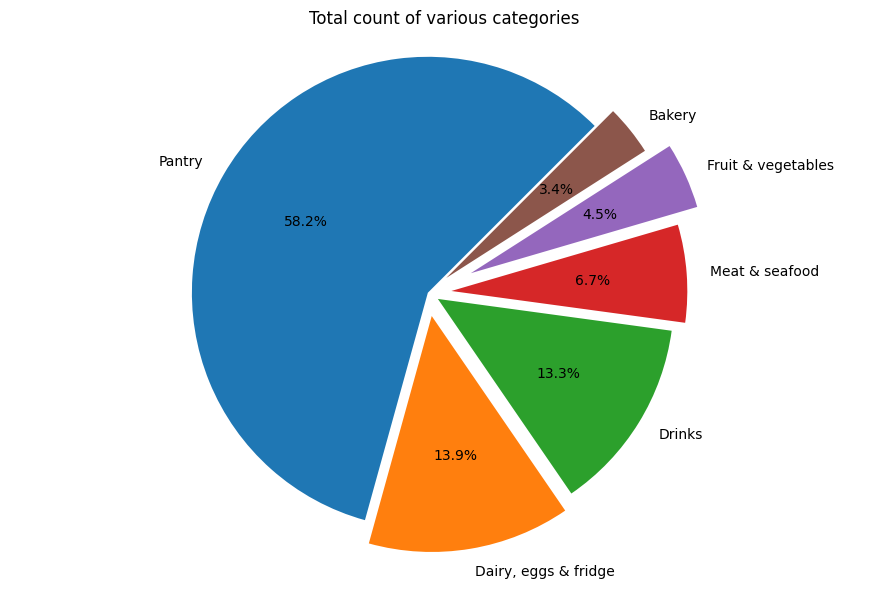

In [24]:
sizes = df['category'].value_counts()
labels = sizes.index
explode = [0, 0.1, 0.05, 0.1,0.2,0.1]

# Plot
plt.figure(figsize=(9,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, startangle=45)
plt.title("Total count of various categories")
plt.axis('equal')
plt.tight_layout()
plt.savefig("pie.png",dpi=300, bbox_inches="tight")
plt.show()